# Большое практическое задание 1
# Классификация изображений цифр метрическими методами

## курс "Машинное обучение 1", программа OzonMasters, 2021

## Студент: <Коротаев Павел Дмитриевич>

## Введение

Данное задание направлено на ознакомление с метрическими алгоритмами классификации, а также методами работы с изображениями. В задании вам будет необходимо:

1. Написать на языке Python собственные реализации метода ближайших соседей и кросс-валидации. Реализации должны соответствовать спецификации, описанной в прилагающихся модулях.     
    Частично проверить правильность выполнения своих реализаций можно с помощью системы ejudge в соответствующем соревновании.
    **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения.


2. Провести описанные ниже эксперименты с датасетом изображений цифр MNIST, описать полученые результаты и ответить на предложенные вопросы.


3. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно.

    **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать:
    `File -> Download as -> HTML (.html).`
    Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de).
Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями.

    Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.

### Некоторые полезные советы

1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль `knn`, можно добавить ячейку с таким содержимым:
     
```
    %load_ext autoreload
    
    %autoreload 2
```
   
2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `knn` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:

```
    tree
    ---knn
    ------__init__.py
    ------classification.py
    ------distances.py
    ------model_selection.py
    ------nearest_neighbors.py
    ---tests
    ------__init__.py
    ------test_classification.py
    ------test_distances.py
    ------test_model_selection.py
    ------test_nearest_neigbours.py
    experiments.ipynb
```

## Реализация алгоритмов (10 баллов)

Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить
все выданные тесты. Задание, не проходящее все выданные тесты, приравнивается к невыполненному. При
написании **необходимо пользоваться** стандартными средствами языка Python и библиотекой numpy. Библиотеками scipy и scikit-learn пользоваться **запрещено**, если это не обговорено отдельно в пункте задания. Для
экспериментов в бонусной части разрешается пользоваться любыми открытыми библиотеками, реализующими
алгоритмы обработки изображений.

Среди предоставленных файлов должны быть следующие модули и функции в них

1. Модуль `knn.distances` с реализацией функции для вычисления расстояния:
    1. `euclidean_distance(X, Y)` — реализация евклидова расстояния с заданными свойствами;
    2. `cosine_distance(X, Y)` — реализация косинусного расстояния с заданными свойствами;


2. Модуль `knn.nearest_neighbors`, содержащий собственную реализацию поиска ближайших соседей.
    
    Класс `NearestNeighborsFinder` с методами:
      1. `__init__(self, n_neighbors, metric="euclidean")` — конструктор (инициализатор) класса;
      2. `fit(self, X, y=None)` — обучение алгоритма;
      3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей.


3. Модуль `knn.classification`, содержащий собственную реализацию классификатора на основе метода ближайших соседей.

    Класс `KNNClassifier` с методами:
    
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’)` — конструктор (инициализатор) класса;
    2. `fit(self, X, y=None)` — обучение алгоритма;
    3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей;
    4. `predict(self, X)` — редсказание на новых данных;
    5. `_predict_precomputed(self, indices, distances)` — вспомогательный метод.
    
   Класс `BatchedKNNClassifier`, полезный для работы с большими выборками, с методами:
   
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’, batch_size=None)` — конструктор (инициализатор) класса
    2. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей, разбитый на несколько итераций по батчам
    3. `set_batch_size(self, batch_size)` — метод для выставления нового значения размера батча


4. Модуль `knn.model_selection` с реализациями функций для применения кросс-валидации:

    1. `knn_cross_val_score(X, y, k_list, scoring, cv=None, **kwargs)` — функция для измерения качества на кросс-валидации.

Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые unit-тесты, которые находятся рядом с модулем `knn` в директории `tests` Чтобы запустить тесты в консоли требуется выполнить одну из команд:


```
$ python -m unittest                            # запуск всех тестов
$ python -m unittest tests/test_distances.py    # запуск конкретных тестов
```

## Эксперименты (15 баллов)

Здесь вы можете заимпортировать всё, что вам потребуется для экспериментов:

In [1]:
import numpy as np

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from knn.distances import euclidean_distance, cosine_distance 
from knn.classification import BatchedKNNClassifier
from knn.model_selection import knn_cross_val_score

In /home/pavel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pavel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pavel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/pavel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pavel/anaconda3/lib/python3.7/site-packages/matplotlib/

### 1. Загрузка даннных

Эксперименты этого задания необходимо проводить на датасете MNIST. Загрузить датасет можно при помощи функции `sklearn.datasets.fetch_openml("mnist_784")` или скачать вручную с сайта
http://yann.lecun.com/exdb/mnist/. Датасет необходимо разбить на обучающую выборку (первые 60 тыс.
объектов) и тестовую выборку (10 тыс. последних объектов).

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [4]:
X_train, y_train  = X[:60000], y[:60000]

In [5]:
X_test, y_test = X[60000:], y[60000:]

In [6]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [7]:
X_test = X_test.astype('int64')
y_test = y_test.astype('int64')
X_train = X_train.astype('int64')
y_train = y_train.astype('int64')

### 2. Исследование скорости методов поиска (4 балла)

Исследуйте, какой алгоритм поиска ближайших соседей будет быстрее работать в различных ситуациях.

Измерьте для каждого алгоритма поиска (`kd_tree`, `ball_tree`, `brute` и `my_own`) время нахождения 5 ближайших соседей для каждого объекта тестовой выборки по евклидовой метрике. Выберите подмножество признаков, по которому будет считаться расстояние, размера 10, 20, 100 (подмножество признаков выбирается один раз для всех объектов, случайно).

**Замечание.** Для оценки времени долго работающих функций можно пользоваться либо функциями из
модуля time, либо magic-командой %time, которая запускает код лишь один раз.

In [10]:
clf_myOwn = BatchedKNNClassifier(5, algorithm = 'my_own', metric = 'euclidean', batch_size = 250)
clf_BallTree = BatchedKNNClassifier(5, algorithm = 'ball_tree', metric = 'euclidean', batch_size = 250)
clf_Brute = BatchedKNNClassifier(5, algorithm = 'brute', metric = 'euclidean', batch_size = 250)
clf_kdTree = BatchedKNNClassifier(5, algorithm = 'kd_tree', metric = 'euclidean', batch_size = 250)

In [11]:
time_MyOwn = []
time_BallTree = []
time_Brute = []
time_kdTree = []

In [ ]:
import random                      
idx = random.sample(range(1, 784), 10)
idx.sort()
X_train_new = X_train[:,idx]
X_test_new = X_test[:,idx]
print(idx)

In [13]:
clf_myOwn.fit(X_train_new, y_train)                                                                           
t =  %timeit -o -q -r 1 clf_myOwn.kneighbors(X_test_new)
time_MyOwn.append(t.best)

In [14]:
clf_BallTree.fit(X_train_new, y_train)
t =  %timeit -o -q -r 1 clf_BallTree.kneighbors(X_test_new)
time_BallTree.append(t.best)

In [15]:
clf_Brute.fit(X_train_new, y_train)
t =  %timeit -o -q -r 1 clf_Brute.kneighbors(X_test_new)
time_Brute.append(t.best)

In [16]:
clf_kdTree.fit(X_train_new, y_train)
t =  %timeit -o -q -r 1 clf_kdTree.kneighbors(X_test_new)
time_kdTree.append(t.best)

In [ ]:
idx = random.sample(range(1, 784), 20)
idx.sort()
X_train_new = X_train[:,idx]
X_test_new = X_test[:,idx]
print(idx)

In [18]:
clf_myOwn.fit(X_train_new, y_train)
t =  %timeit -o -q -r 1 clf_myOwn.kneighbors(X_test_new)
time_MyOwn.append(t.best)

In [19]:
clf_BallTree.fit(X_train_new, y_train)
t =  %timeit -o -q -r 1 clf_BallTree.kneighbors(X_test_new)
time_BallTree.append(t.best)

In [20]:
clf_Brute.fit(X_train_new, y_train)
t =  %timeit -o -q -r 1 clf_Brute.kneighbors(X_test_new)
time_Brute.append(t.best)

In [21]:
clf_kdTree.fit(X_train_new, y_train)
t =  %timeit -o -q -r 1 clf_kdTree.kneighbors(X_test_new)
time_kdTree.append(t.best)

In [ ]:
idx = random.sample(range(1, 784), 100)
idx.sort()
X_train_new = X_train[:,idx]
X_test_new = X_test[:,idx]
print(idx)

In [23]:
clf_myOwn.fit(X_train_new, y_train)
t =  %timeit -o -q -r 1 clf_myOwn.kneighbors(X_test_new)
time_MyOwn.append(t.best)

In [24]:
clf_BallTree.fit(X_train_new, y_train)
t =  %timeit -o -q -r 1 clf_BallTree.kneighbors(X_test_new)
time_BallTree.append(t.best)

In [25]:
clf_Brute.fit(X_train_new, y_train)
t =  %timeit -o -q -r 1 clf_Brute.kneighbors(X_test_new)
time_Brute.append(t.best)

In [26]:
clf_kdTree.fit(X_train_new, y_train)
t =  %timeit -o -q -r 1 clf_kdTree.kneighbors(X_test_new)
time_kdTree.append(t.best)

#### Приведите график / таблицу с результатами вашего эксперимента

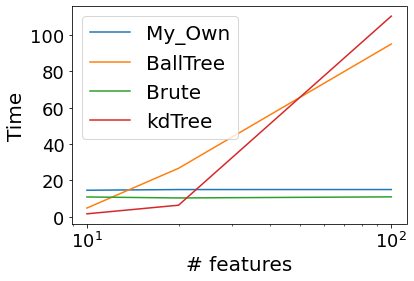

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([10,20,100], time_MyOwn, label="My_Own")
plt.plot([10,20,100], time_BallTree, label="BallTree")
plt.plot([10,20,100], time_Brute, label="Brute")
plt.plot([10,20,100], time_kdTree, label="kdTree")
plt.legend(fontsize=20)
plt.xlabel("# features", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.xscale("log")
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

#### Ответьте на следующие вопросы

1. Какой алгоритм сработал быстрее всего для каждого из размера подвыборок? Ожидали ли вы такие результаты до проведения эксперимента?

    Честно, не ожидал, сработал быстрее всех Brute и MyOwn. Но, кажется, догадываюсь почему так случилось

2. Приведите теоретическую сложность каждого из алгоритмов поиска. Согласуется ли время работы алгоритмов на практике с их теоретической вычислительной сложностью? Как вы думаете, почему?

N - кол-во векторов в train
K - кол-во ближайших соседей

My Own:
O(N + KLogK)
Brute:
O(N * K)
k-d Tree:
O(k * LogN)
Ball Tree:
O(k * LogN)
Можно заметить, что у My Own и Brute вычислительная сложность более менее согласуется, а вот у остальных двух методов, нет. Хотя на 10 фичах BallTree и Kd-Tree работают быстрее чем Brute и MyOwn. Но после 100 они работают намного медленее, возможно это связано с тем, что kd-Tree и BallTree проводят предобработку выборки, в обоих случаях используются деревья, и из-за того, что пространство не 2-ух мерное, придется делать больше разбиений, что приведет к большому кол-ву листьев в деревьях, к тому же из-за  проклятья размерности, мы знаем, что большинство объектов будут сконцентированы на границах d-мерного шара (Теор ДЗ1). Это означает, что придется спускаться по дереву глубоко. Также это может быть связано с тем, что у обоих методов есть параметр leaf_size, которое изначально равен 40. leaf_size отвечат за количество точек, по достижению которого, алгоритмы будут использовать brute для нахождения ближайших соседей, что влияет на время работы. Это связано с тем, что алгоритмам может не хватить памяти для хранения деревьев и чтобы этого не происходило они переключаются на brute 

3. Какой алгоритм исходя из результатов эксперимента следует использовать в дальнейшем? Выберите алгоритм поиска соседей, который вы будете использовать во всех экспериментах ниже. 

    Исходя из результатов эксперимента следует использовать либо Brute, либо My_Own. Хотелось бы протестировать свой класс, поэтому выбираю My_Own

### 3. Исследование зависимости точности алгоритма на кросс-валидации (4 балла)


Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) алгоритма k ближайших соседей в зависимости от следующих факторов:
* количество соседей k от 1 до 10
* используется евклидова или косинусная метрика

In [12]:
from sklearn.model_selection import KFold, BaseCrossValidator

cv = KFold(n_splits=3)

In [ ]:

predicted = knn_cross_val_score(X_train, y_train, k_list=np.arange(1,11), cv=cv, scoring='accuracy',
            metric='euclidean', weights='uniform', algorithm='my_own',batch_size = 1000)


In [ ]:
predicted2 = knn_cross_val_score(X_train, y_train, k_list=np.arange(1,11), cv=cv, scoring='accuracy',
            metric='cosine', weights='uniform', algorithm='my_own',batch_size = 1000)

#### Нарисуйте график зависимости точности от количества соседей по каждой метрике

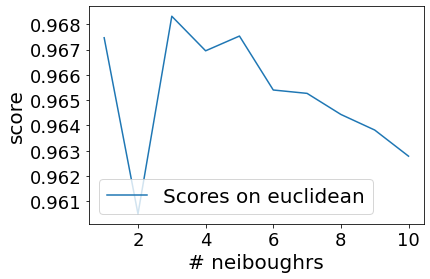

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
mean_socre = [] 
for k in np.arange(1,11):
    mean_socre.append(np.mean(predicted[k]))

    
plt.plot(np.arange(1,11), mean_socre, label="Scores on euclidean")
plt.legend(fontsize=20)
plt.xlabel("# neiboughrs", fontsize=20)
plt.ylabel("score", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

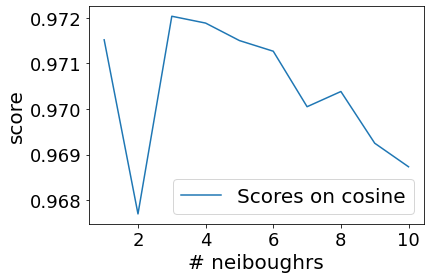

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
mean_socre = [] 
for k in np.arange(1,11):
    mean_socre.append(np.mean(predicted2[k]))

    
plt.plot(np.arange(1,11), mean_socre, label="Scores on cosine")
plt.legend(fontsize=20)
plt.xlabel("# neiboughrs", fontsize=20)
plt.ylabel("score", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор (например, если у вас несколько наборов параметров с высоким качеством, обоснуйте как вы выберите среди этих наборов один).

   Лучшие скоры получаются у обоих метрик на k = 3, а далее точность у обоих метрик падает. Поэтому  k = 3 наиболее оптимален


2. Какая метрика лучше себя показала в экспериментах? Можете ли вы объяснить, почему?

    Лучше показала себя метрика cosine. Возможно это связано с тем, что пр-во объектов это сильно разряженные вектора, поэтому евклидова метрика, которая сильно полагается на значение в каждой компоненте, работает хуже, чем косинусное метрика, которая смотрит на угол между векторами.
    
   
2. Есть ли на графике зависимости точности от количество соседей "выбросы", резкие падения/повышения качества для одного значения k по сравнению с соседними? Если да, предположите причину появления этих выбросов.

    Резкое падение скора на обоих графиках происходит при k = 2, скорее всего это связано, с тем, что алгоритм predict реализован так, что при равном кол-ве меток, он берет меньшую.

### 3. Исследование зависимости точности взвешенного алгоритма на кросс-валидации (4 балла)

По результатам предыдущего эксперимента выберите метрику, которую вы будете использовать в этом эксперименте.

Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) взвешенного алгоритма k ближайших соседей в зависимости от количество соседей k (от 1 до 10).

Голос объекта положите равным `1 / (distance + eps)`, где `eps` = `1e-5`.

In [ ]:
predicted = knn_cross_val_score(X_train, y_train, k_list=np.arange(1,11), cv=cv, scoring='accuracy',
            metric='cosine', weights='distance', algorithm='my_own',batch_size = 1000)


#### Нарисуйте график зависимости точности от количества соседей 

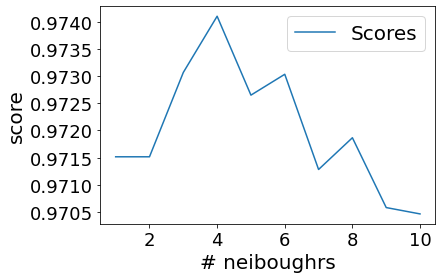

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
mean_socre = [] 
for k in np.arange(1,11):
    mean_socre.append(np.mean(predicted[k]))

    
plt.plot(np.arange(1,11), mean_socre, label="Scores")
plt.legend(fontsize=20)
plt.xlabel("# neiboughrs", fontsize=20)
plt.ylabel("score", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор.

   По графику можно сделать, что лучший скор достигается при k = 4.При остальных k скор немного хуже                          


2. Сравните результаты взвешенного алгоритма с невзвешенным. Объясните разницу/отсутствие разницы в результатах.

   При использовании взвешенного алгоритма голосования, скор немного вырос. Возможно, это связано, что мы теперь при голосовании учитываем расстояние до объекта, похоже, что при классификации каких-то меток было больше, но они были дальше от объекта, чем истинные

### 4. Применение алгоритма и интерпретация ошибок (3 балла)

1. Примените лучший алгоритм к исходной обучающей и тестовой выборке и посчитайте точность классификации. Сравните с точностью по кросс-валидации. Опишите ваши результаты.

In [19]:
clf_myOwn = BatchedKNNClassifier(4, algorithm = 'my_own', metric = 'cosine',weights='distance',
                                 batch_size = 1000)

In [20]:
clf_myOwn.fit(X_train,y_train)

In [ ]:
y_pred = clf_myOwn.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9752

   Скор не снизился, по сравнению с кросс-валидацией, даже возрос немного. Значит, на кросс-валидации были подобраны оптимальные параметры

2. Постройте и проанализируйте матрицу ошибок (confusion matrix), используйте функцию `sklearn.metrics.confusion_matrix`. Визуализируйте несколько объектов из тестовой выборки, на которых были допущены ошибки. Проанализируйте и укажите их общие черты.

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred,labels = [0,1,2,3,4,5,6,7,8,9])

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1129,    3,    1,    0,    0,    2,    0,    0,    0],
       [   8,    0, 1009,    1,    1,    0,    0,    8,    5,    0],
       [   0,    1,    3,  976,    1,   12,    0,    4,    9,    4],
       [   2,    1,    0,    0,  946,    0,    6,    2,    0,   25],
       [   4,    0,    0,    9,    1,  863,    7,    1,    4,    3],
       [   3,    3,    0,    0,    1,    3,  948,    0,    0,    0],
       [   2,   10,    4,    0,    1,    0,    0,  998,    0,   13],
       [   7,    1,    2,    9,    3,    3,    5,    4,  936,    4],
       [   7,    7,    2,    5,    7,    3,    1,    4,    3,  970]])

Заметим, что большинство ошибок происходят на похожих цифрах, 0 путается с 8 и 9, 1 с 7, 3 с 5 и т.д.

In [24]:
errors = (y_pred != y_test)

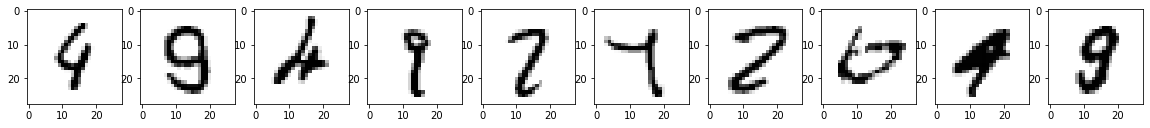

In [26]:
NUMBER_DIGITS = 10

plt.figure(figsize=(20, 12))
digits = X_test[errors][:NUMBER_DIGITS]
for i, digit in enumerate(digits):
    plt.subplot(1, len(digits), i + 1)
    plt.imshow(digit.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')

Почем-то алгоритм плохо сработал на первых двух цифрах, хотя они вроде бы внятно нарисованы, а вот в отсальных даже человек, скорее всего, сделал бы ошибку. Некторые цифры нарисованы неаккуратно или так, что похожи на другие цифры